## EDA
### Demographic & Customer Profile Analysis

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load the cleaned data
df = pd.read_csv("../data/processed/cleaned_telco_customer_churn.csv")

print(df.shape)
df.head()

(7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. Does churn vary by gender?
Analyzing churn rates between male and female customers to identify any significant differences.

In [4]:
gender_wise_churn_rate = df.groupby(by='gender')['Churn'].value_counts(normalize=True).round(2).to_frame()
gender_wise_churn_rate

proportion
gender Churn            
Female No           0.73
       Yes          0.27
Male   No           0.74
       Yes          0.26

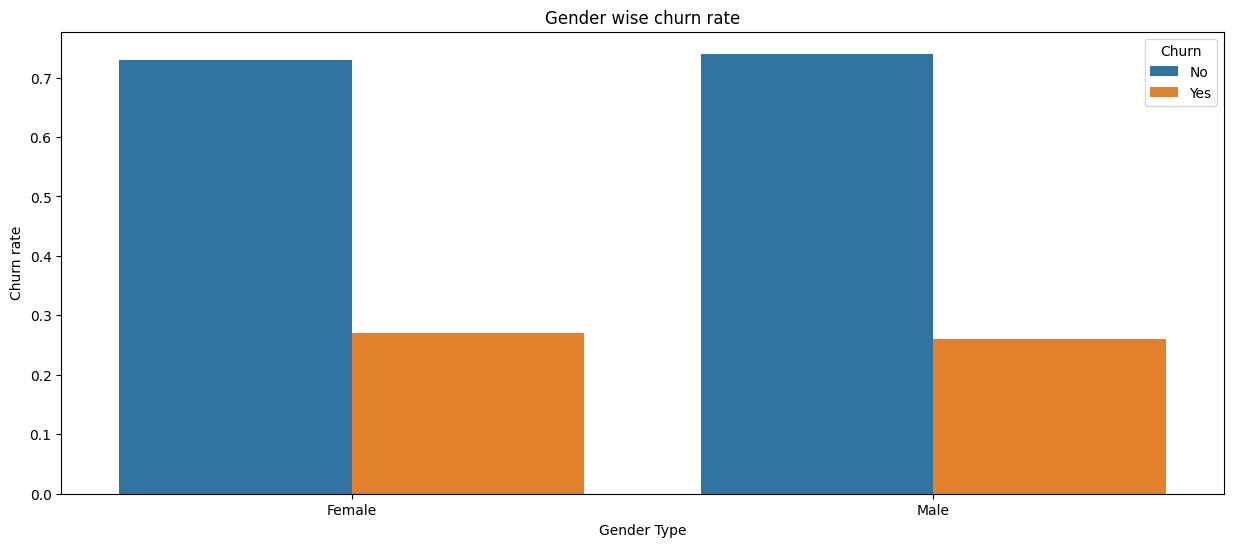

In [5]:
## Visualize
plt.figure(figsize=(15,6))
sns.barplot(data=gender_wise_churn_rate, x='gender', y='proportion', hue='Churn')
plt.title('Gender wise churn rate')
plt.xlabel('Gender Type')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
Churn rate varies with gender but not so much. The churn rate for female (27%) is slighly higher than male(26%) customers. 

### 2. Are senior citizens more likely to churn?
Analyzing churn rates among senior citizens compared to other age groups to determine if age is a significant factor in customer retention.

In [6]:
age_wise_churn_rate = df.groupby(by='SeniorCitizen')['Churn'].value_counts(normalize=True).round(2).to_frame()
age_wise_churn_rate

proportion
SeniorCitizen Churn            
0             No           0.76
              Yes          0.24
1             No           0.58
              Yes          0.42

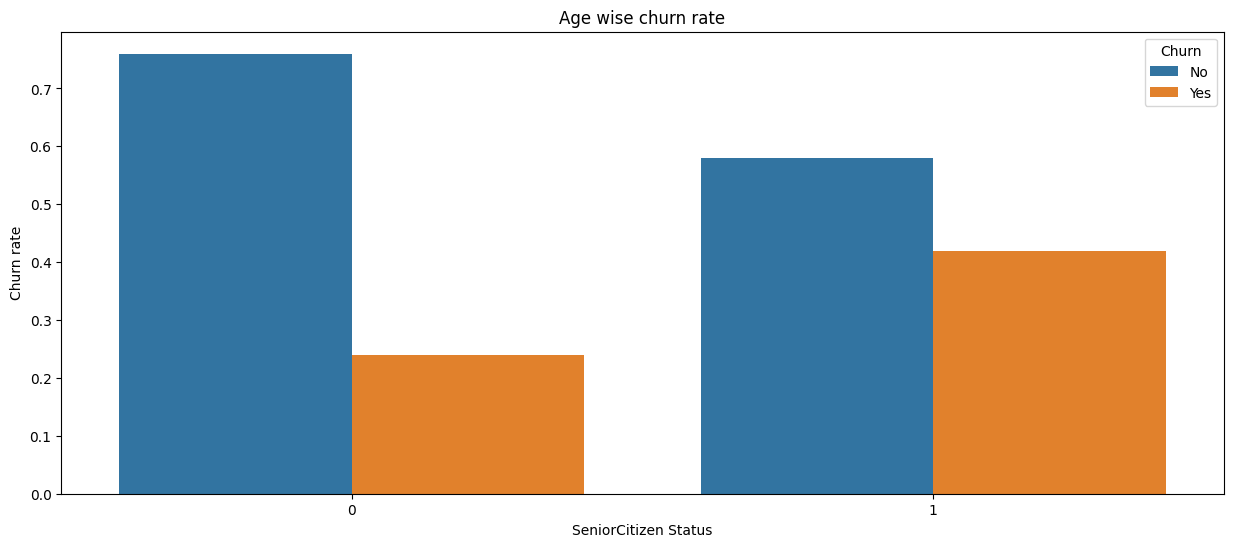

In [7]:
## Visualize
plt.figure(figsize=(15,6))
sns.barplot(data=age_wise_churn_rate, x='SeniorCitizen', y='proportion', hue='Churn')
plt.title('Age wise churn rate')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
This analysis indicates that senior citizens have a higher churn rate of approximately 42%, compared to 24% for non-senior customers. This suggests that age may play a role in customer retention, and targeted strategies may be needed to address the specific needs and concerns of senior customers.

### 3. How does churn differ for customers with partners or dependents?
Customers with partners or dependents may have different needs and priorities, which can influence their likelihood of churning. Understanding these differences can help tailor retention strategies to specific customer segments.


In [8]:
## Churn rate of customers based on partner
partner_wise_churn_rate = df.groupby(by='Partner')['Churn'].value_counts(normalize=True).round(2).to_frame()
partner_wise_churn_rate

proportion
Partner Churn            
No      No           0.67
        Yes          0.33
Yes     No           0.80
        Yes          0.20

In [9]:
## Churn rate of customers based on denpendencies
dependent_wise_churn_rate = df.groupby(by='Dependents')['Churn'].value_counts(normalize=True).round(2).to_frame()
dependent_wise_churn_rate

proportion
Dependents Churn            
No         No           0.69
           Yes          0.31
Yes        No           0.84
           Yes          0.16

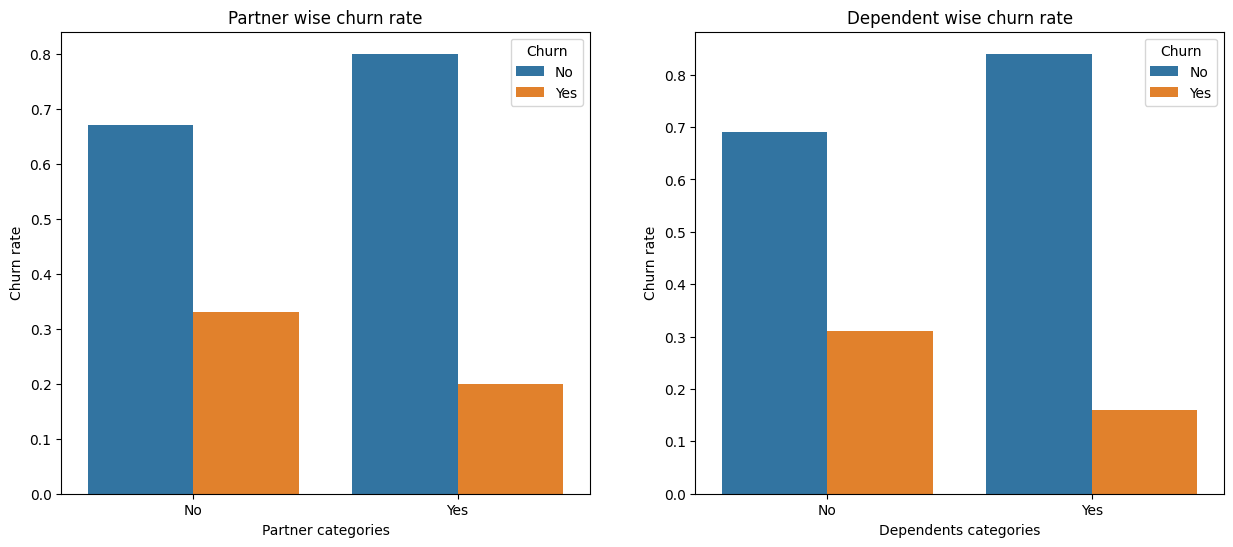

In [10]:
## Visualization
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=partner_wise_churn_rate, x='Partner', y='proportion', hue='Churn')
plt.title('Partner wise churn rate')
plt.xlabel('Partner categories')
plt.ylabel('Churn rate')

plt.subplot(1,2,2)
sns.barplot(data=dependent_wise_churn_rate, x='Dependents', y='proportion', hue='Churn')
plt.title('Dependent wise churn rate')
plt.xlabel('Dependents categories')
plt.ylabel('Churn rate')

plt.show()

#### Comment:
* This analysis shows that customer without partners  and dependents have a higher churn rate.
* Churn rate for customers without partners is approximately 33%
* Churn rate for customers without dependencis is approximately 31%

### 4. Which demographic group has the highest churn probability?
Understanding churn rates across different demographic groups (gender, SeniorCitizen, Partner, Dependents).

In [11]:
demographic_groups_wise_churn=pd.pivot_table(data=df, index=['Churn', 'gender', 'SeniorCitizen'], columns=['Partner', 'Dependents'], aggfunc='size')
demographic_groups_wise_churn

Partner                      No       Yes     
Dependents                   No  Yes   No  Yes
Churn gender SeniorCitizen                    
No    Female 0              909  110  482  710
             1              159    2  136   31
      Male   0              962  166  438  713
             1              126    4  176   31
Yes   Female 0              428   32  113  124
             1              158    1   73    8
      Male   0              418   43  128  105
             1              117    1  105   12

#### Comment:
* There are 32 possibe demographic groups based on the combinations.
* Among these groups, the one with the highest churn numbers is (**Gender: Female, SeniorCitizen: No, Partner: No, Dependents: No**) with a churn count of 428.
* So, this demographic group has the highest churn probability compared to other groups.

### 5. Is there a demographic segment that is low churn but high revenue?


In [12]:
demographic_segment_with_revenue = df.groupby(by=['Churn','gender', 'SeniorCitizen', 'Dependents', 'Partner']).agg({'Churn':'size', 'TotalCharges':'sum'}).loc['Yes', :]
demographic_segment_with_revenue['PerChurnRevenue'] = demographic_segment_with_revenue['TotalCharges']/demographic_segment_with_revenue['Churn']
demographic_segment_with_revenue.sort_values(by=['PerChurnRevenue'], ascending=False)

Churn  TotalCharges  PerChurnRevenue
gender SeniorCitizen Dependents Partner                                      
Male   1             Yes        Yes         12      47452.70      3954.391667
       0             No         Yes        128     330260.90      2580.163281
Female 1             No         Yes         73     184059.00      2521.356164
Male   1             No         Yes        105     263073.95      2505.466190
Female 1             Yes        Yes          8      19544.15      2443.018750
       0             No         Yes        113     245110.85      2169.122566
Male   0             Yes        Yes        105     226882.90      2160.789524
Female 0             Yes        Yes        124     236720.05      1909.032661
       1             No         No         158     211737.40      1340.110127
Male   1             No         No         117     156377.15      1336.556838
       0             No         No         418     446439.30      1068.036603
Female 0             No         No         428     420269.30       981.937617
                     Yes        No          32      31095.55       971.735937
Male   0             Yes        No          43      39270.45       913.266279
Female 1             Yes        No           1         71.00        71.000000
Male   1             Yes        No           1         50.15        50.150000

#### Comment:
Demographic segment with **gender: male, SeniorCitizen: yes, Dependents: yes, Partner: Yes** has **low churn** (churn_count=12) but **high revenue** (revenue_per_churn=3954.40). This segment could be targeted for upselling or cross-selling opportunities to further enhance revenue while maintaining low churn rates.

---
### 👨‍💻 Author Information
**Name:** [Amaresh Maity]  
**Date:** 2026-01-07  
**Role:** [Data Scientist | AI Engineer]



#### Let's Connect!

If you have questions about this analysis or would like to collaborate, feel free to reach out:

* **LinkedIn:** [LinkedIn](https://www.linkedin.com/in/amareshmaity/)
* **GitHub:** [@amareshmaity](https://github.com/amareshmaity)
* **Email:** [contacttoamaresh@gmail.com](mailto:contacttoamaresh@gmail.com)
